## Jackknife

In [180]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

%matplotlib inline

In [181]:
N = 100

In [182]:
def calc_avg_leave_one_out_func(func, sample):
    means = []
    for i in range(len(sample)):
        loo_sample = np.hstack([sample[:i], sample[i + 1:]])
        res = func(loo_sample)
        means.append(res)
    
    means = np.array(means)
    return means.mean(), means.var()

In [197]:
def calculate_biases(sample, mean, skew, median):
    jackknife_mean, mean_var = calc_avg_leave_one_out_func(np.mean, sample)
    just_mean = np.mean(sample)
    
    jackknife_skew, skew_var = calc_avg_leave_one_out_func(st.skew, sample)
    just_skew = st.skew(sample)
    
    jackknife_median, median_var = calc_avg_leave_one_out_func(np.median, norm_sample)
    just_median = np.median(norm_sample)

    print('Just mean error = {}'.format(abs(just_mean - mean)))
    print('Jackknife mean error = {}'.format(abs(jackknife_mean - mean)))
    print('Jackknife mean variance = {}'.format(mean_var))
    print('Mean percents = {}'.format(abs(jackknife_mean - mean) / mean))
    bias = (N - 1) * (jackknife_mean - just_mean)
    print('Bias = {}\n'.format(bias))
    
    print('Just skew error = {}'.format(abs(just_skew - skew)))
    print('Jackknife skew error = {}'.format(abs(jackknife_skew - skew)))
    print('Jackknife skew variance = {}'.format(skew_var))
    print('Skew percents = {}'.format(abs(jackknife_skew - skew) / skew))
    bias = (N - 1) * (jackknife_skew - just_skew)
    print('Bias = {}\n'.format(bias))
    
    print('Just median error = {}'.format(abs(just_median - median)))
    print('Jackknife median error = {}'.format(abs(jackknife_median - median)))
    print('Jackknife median variance = {}'.format(median_var))
    print('Median percents = {}'.format(abs(jackknife_median - median) / median))
    bias = (N - 1) * (jackknife_median - just_median)
    print('Bias = {}'.format(bias))

### Log-normal distribution

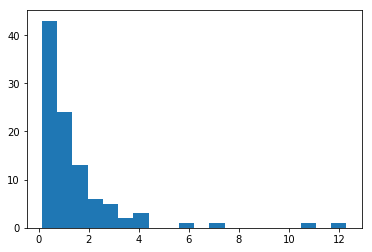

In [198]:
log_norm = st.lognorm(1.0)
mean, var, skew, kurt = log_norm.stats(moments='mvsk')
median = log_norm.ppf(0.5)

lognorm_sample = log_norm.rvs(N)

plt.hist(lognorm_sample, bins=20);

In [199]:
calculate_biases(lognorm_sample, mean, skew, median)

Just mean error = 0.18259331658048406
Jackknife mean error = 0.18259331658048428
Jackknife mean variance = 0.00035384689867292395
Mean percents = 0.11074844476467885
Bias = -2.19824158875781e-14

Just skew error = 2.5322971792997118
Jackknife skew error = 2.535357303837006
Jackknife skew variance = 0.0038379390851279844
Skew percents = 0.4099284831383993
Bias = -0.30295232919213744

Just median error = 1.2362602158394087
Jackknife median error = 1.2362602158394087
Jackknife median variance = 0.00023303589644297845
Median percents = 1.2362602158394087
Bias = -2.7478019859472624e-15


### Normal distribution

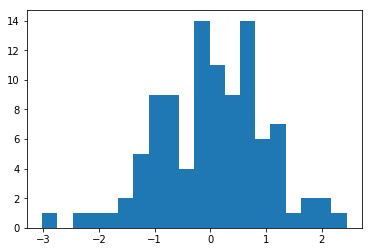

In [200]:
norm = st.norm()
mean, var, skew, kurt = norm.stats(moments='mvsk')
median = norm.ppf(0.5)

norm_sample = norm.rvs(N)

plt.hist(norm_sample, bins=20);

In [201]:
calculate_biases(norm_sample, mean, skew, median)

Just mean error = 0.02491036088292639
Jackknife mean error = 0.02491036088292639
Jackknife mean variance = 9.635350337887042e-05
Mean percents = inf
Bias = 0.0

Just skew error = 0.2603015615242515
Jackknife skew error = 0.2600484312772865
Jackknife skew variance = 0.0009098808738795659
Skew percents = inf
Bias = 0.025059894449534437

Just median error = 0.07570219322082397
Jackknife median error = 0.07570219322082399
Jackknife median variance = 4.910818919346005e-07
Median percents = inf
Bias = 1.3739009929736312e-15


/home/vladvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/vladvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/vladvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
f